In [22]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Load model logs
Merge several models into a single logfile for plotting

In [26]:
# A: Show training loss for SegAN_IO base models
#models = ['Segan_IO_TF2_brats_on_T1', 'Segan_IO_TF2_brats_on_T1c', 'Segan_IO_TF2_brats_on_T2', 'Segan_IO_TF2_brats_on_FLAIR']
#models = ['Segan_IO_TF2_bd2decide_on_T1']
# B: First run of transfer experiments
#models = ['Segan_IO_TF2_brats_on_FLAIR', 'Segan_IO_TF2_bd2decide_on_T1', 'Transfer_BratsFLAIR_disc_Bc2T1', 'Transfer_BratsFLAIR_disc_Bc2T1_lastlayers', 'Transfer_BratsFLAIR_disc_Bc2T1_init']
# C: Using concat in generator instead of add
#models =  ['Segan_IO_TF2_brats_on_FLAIR', 'Segan_IO_Concat_TF2_brats_on_FLAIR']
# D: Like C, testing different models on b2T1
# models =  ['Segan_IO_TF2_bd2decide_on_T1', 
#            'Segan_IO_fix_TF2_bd2decide_on_T1', 
#            'Segan_IO_fix_alternating_364_bd2decide_on_T1',
#            'Segan_IO_fix_alternating_364_brats_on_FLAIR']
#models = ['Segan_IO_TF2_brats_on_FLAIR', 'Custom_MultiFOV_brats_on_FLAIR', 'Segan_IO_fix_brats_on_FLAIR']
models = ['Segan_IO_TF2_brats_on_FLAIR', 'Segan_IO_fix_brats_on_FLAIR']
LIMIT_EPOCH_TO = 1000
runs = ['valid', 'train']
dfs = []

for mod in models:
    for run in runs:
        df = pd.read_csv('models/{}/log_{}.csv'.format(mod, run), index_col=0)
        df['model'] = mod
        df['run'] = run
        df = df.reset_index()
        dfs += [df]
log = pd.concat(dfs)
log = log[log['epoch']<=LIMIT_EPOCH_TO]

In [27]:
def plot(stat):
    plt.figure(figsize=(32, 16))
    plt.title(stat.replace('_', ' '))
    return sb.lineplot(data=log, x='epoch', y=stat, size='run', hue='model')

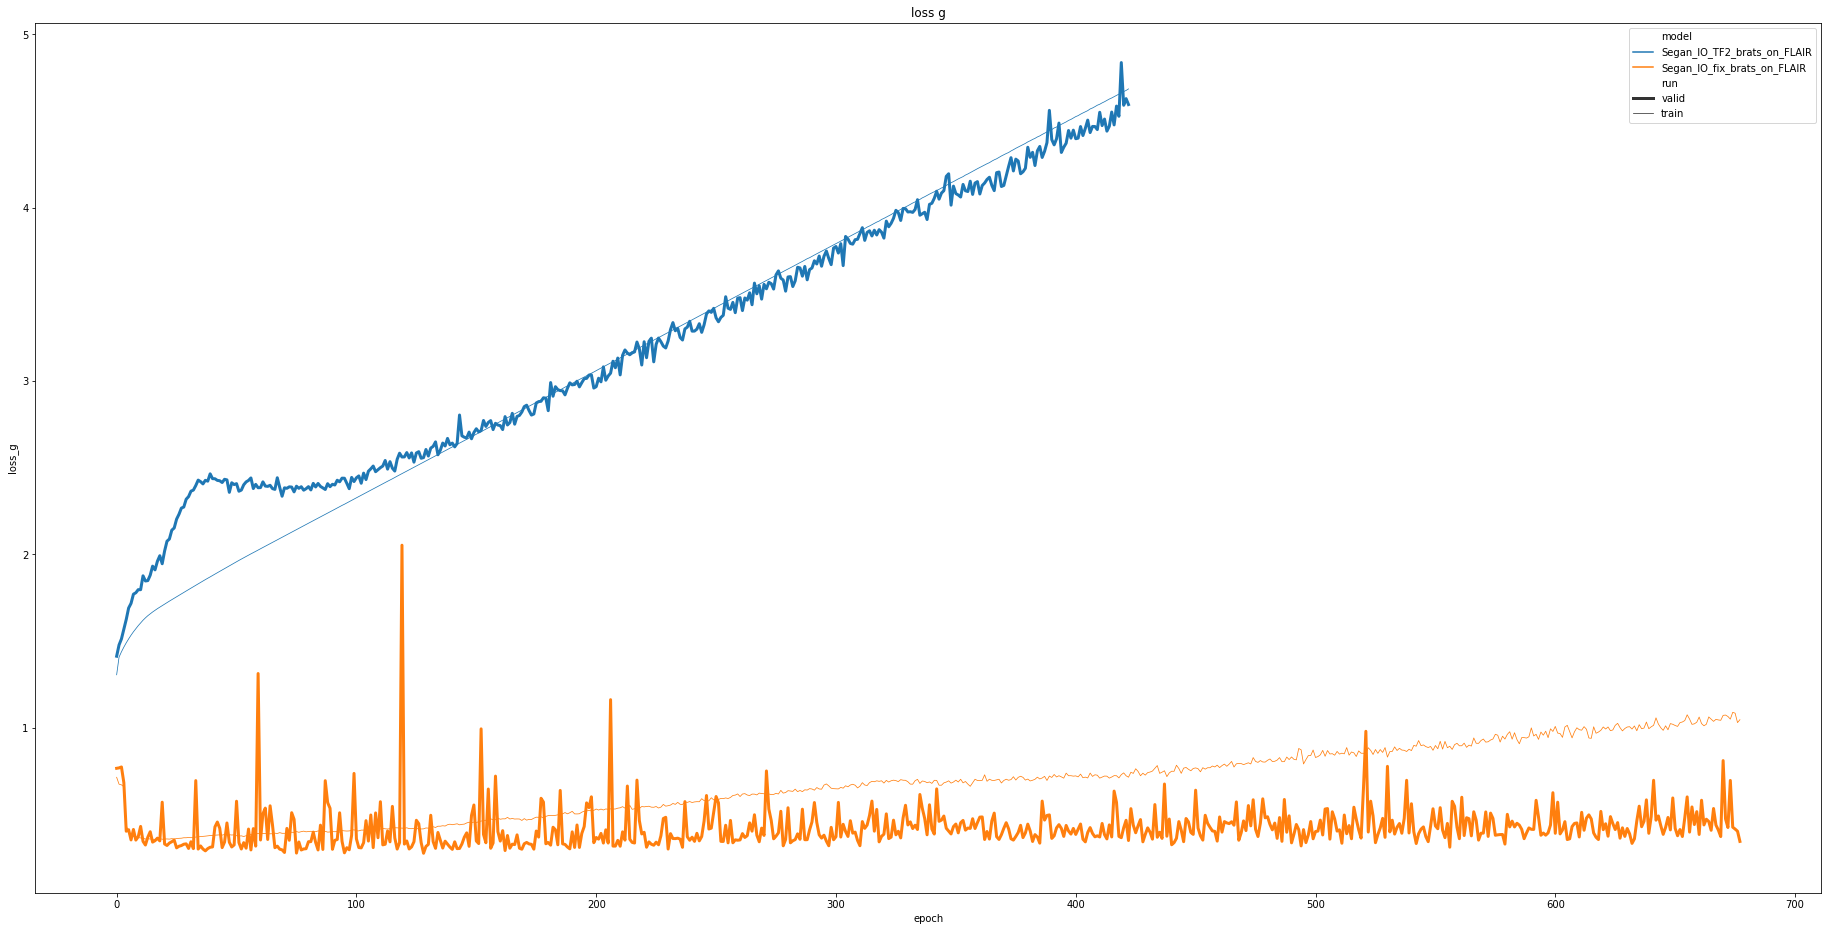

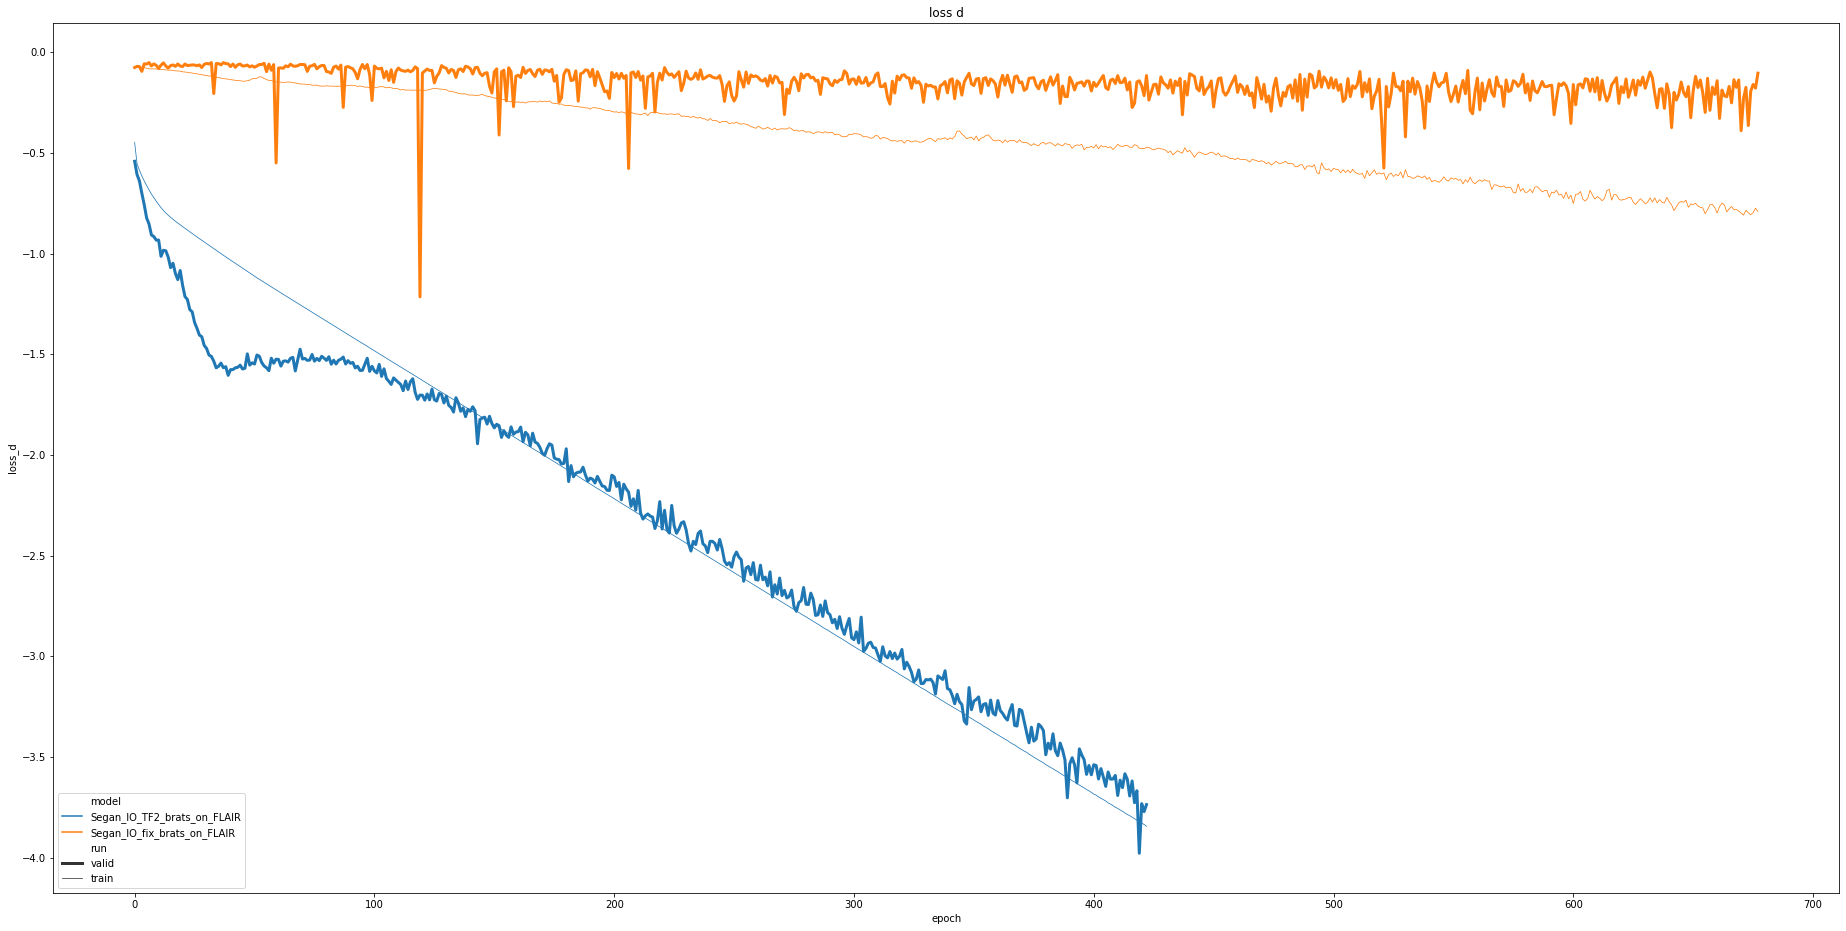

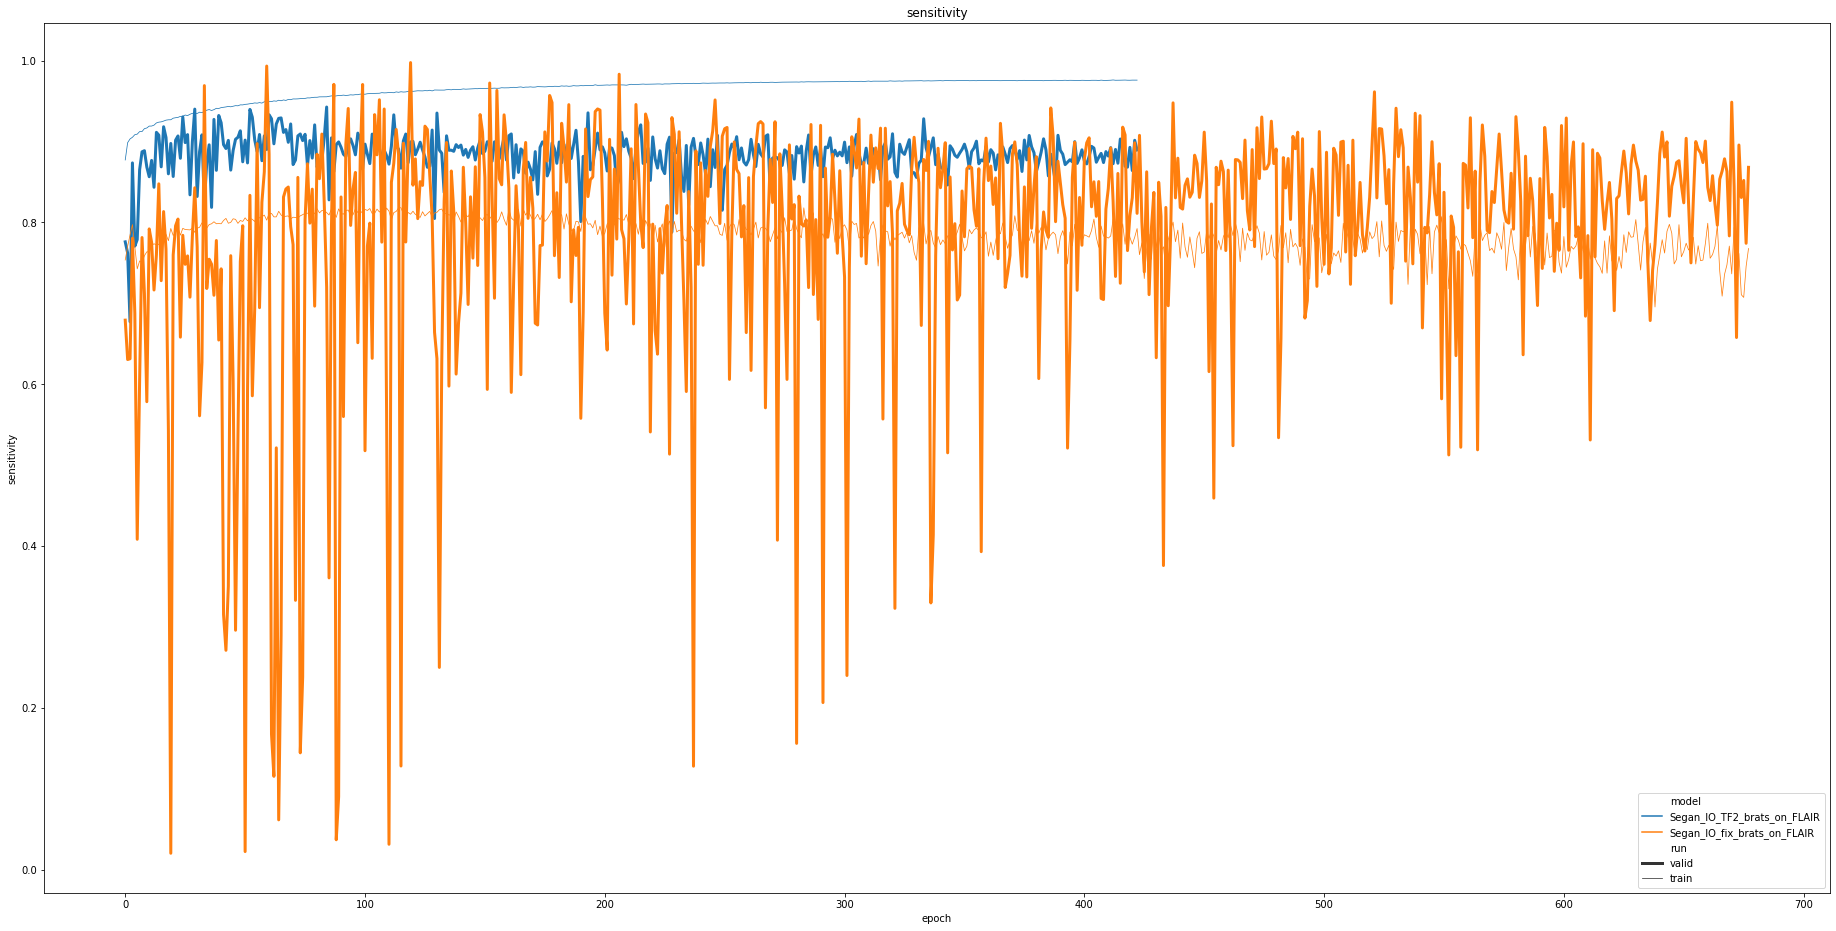

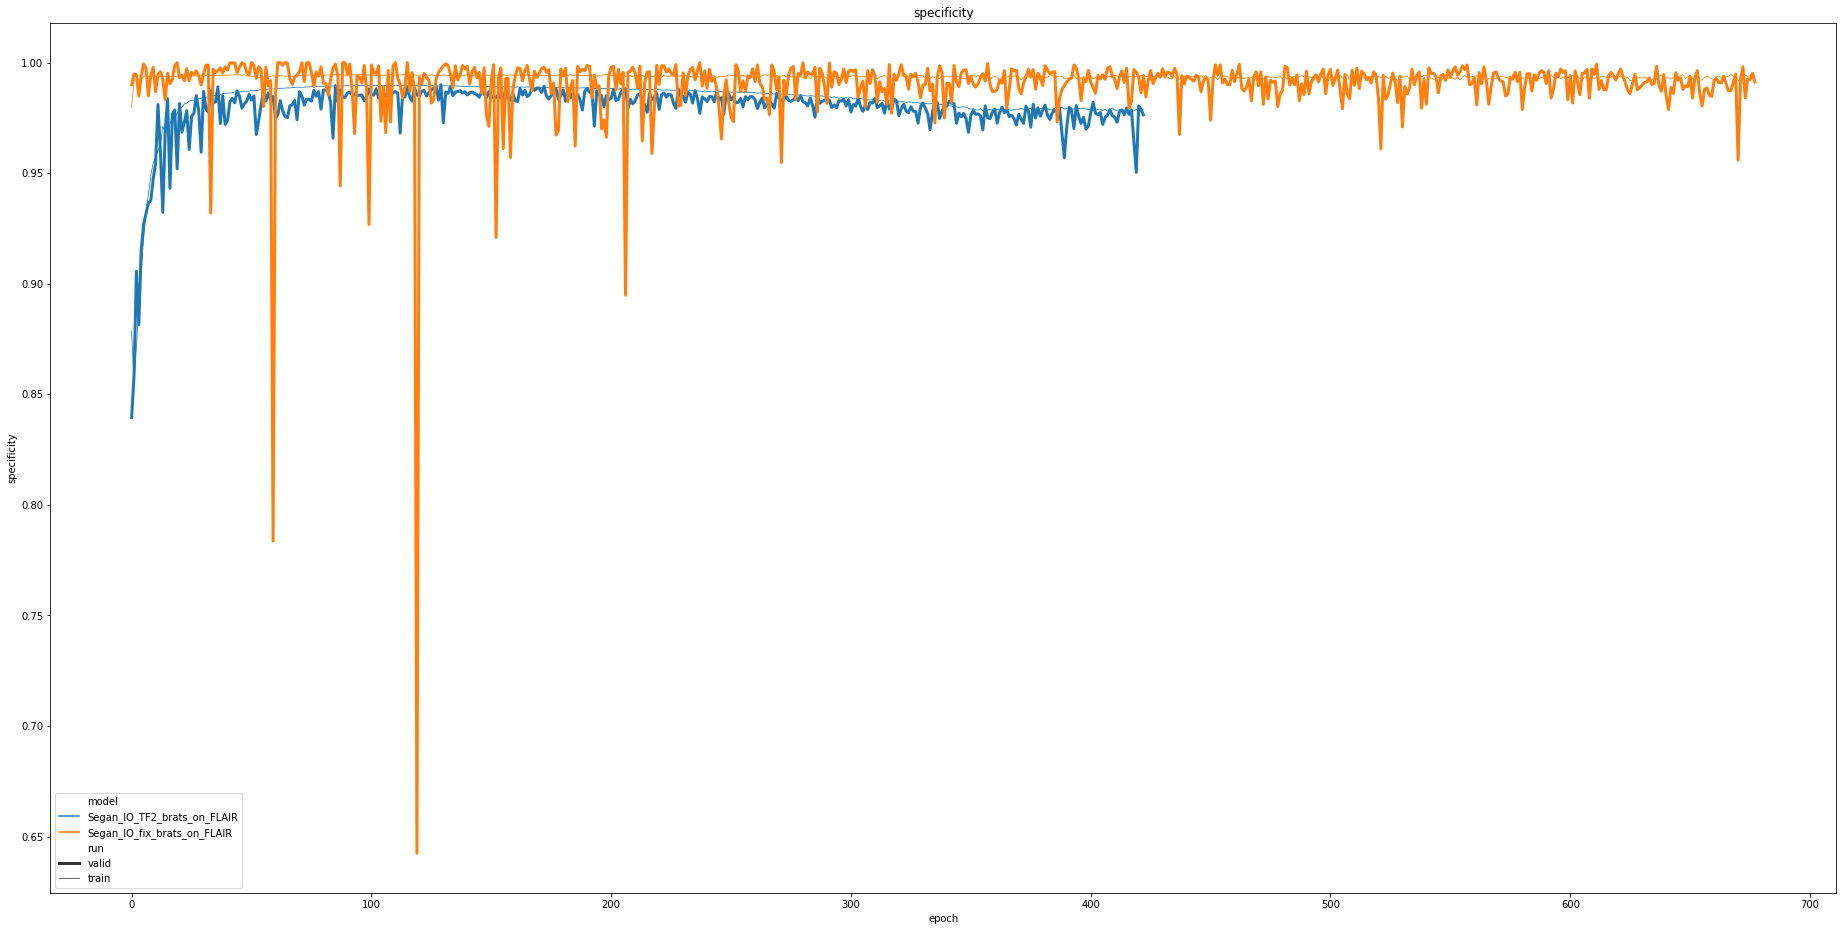

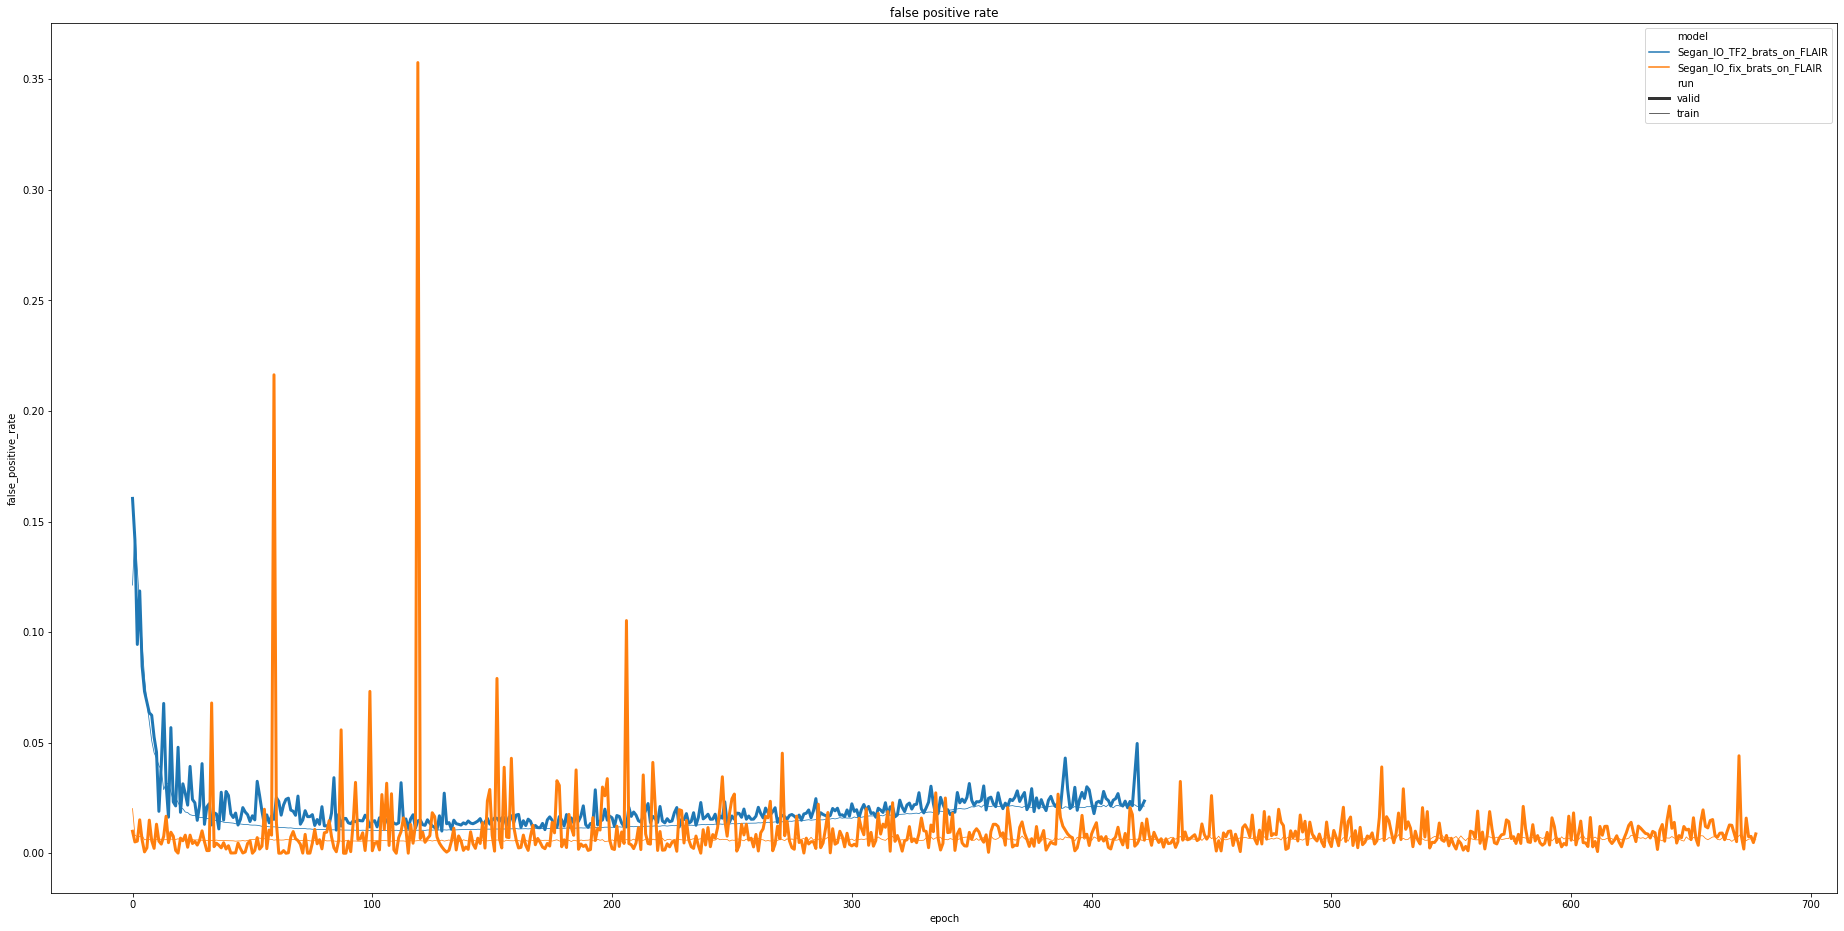

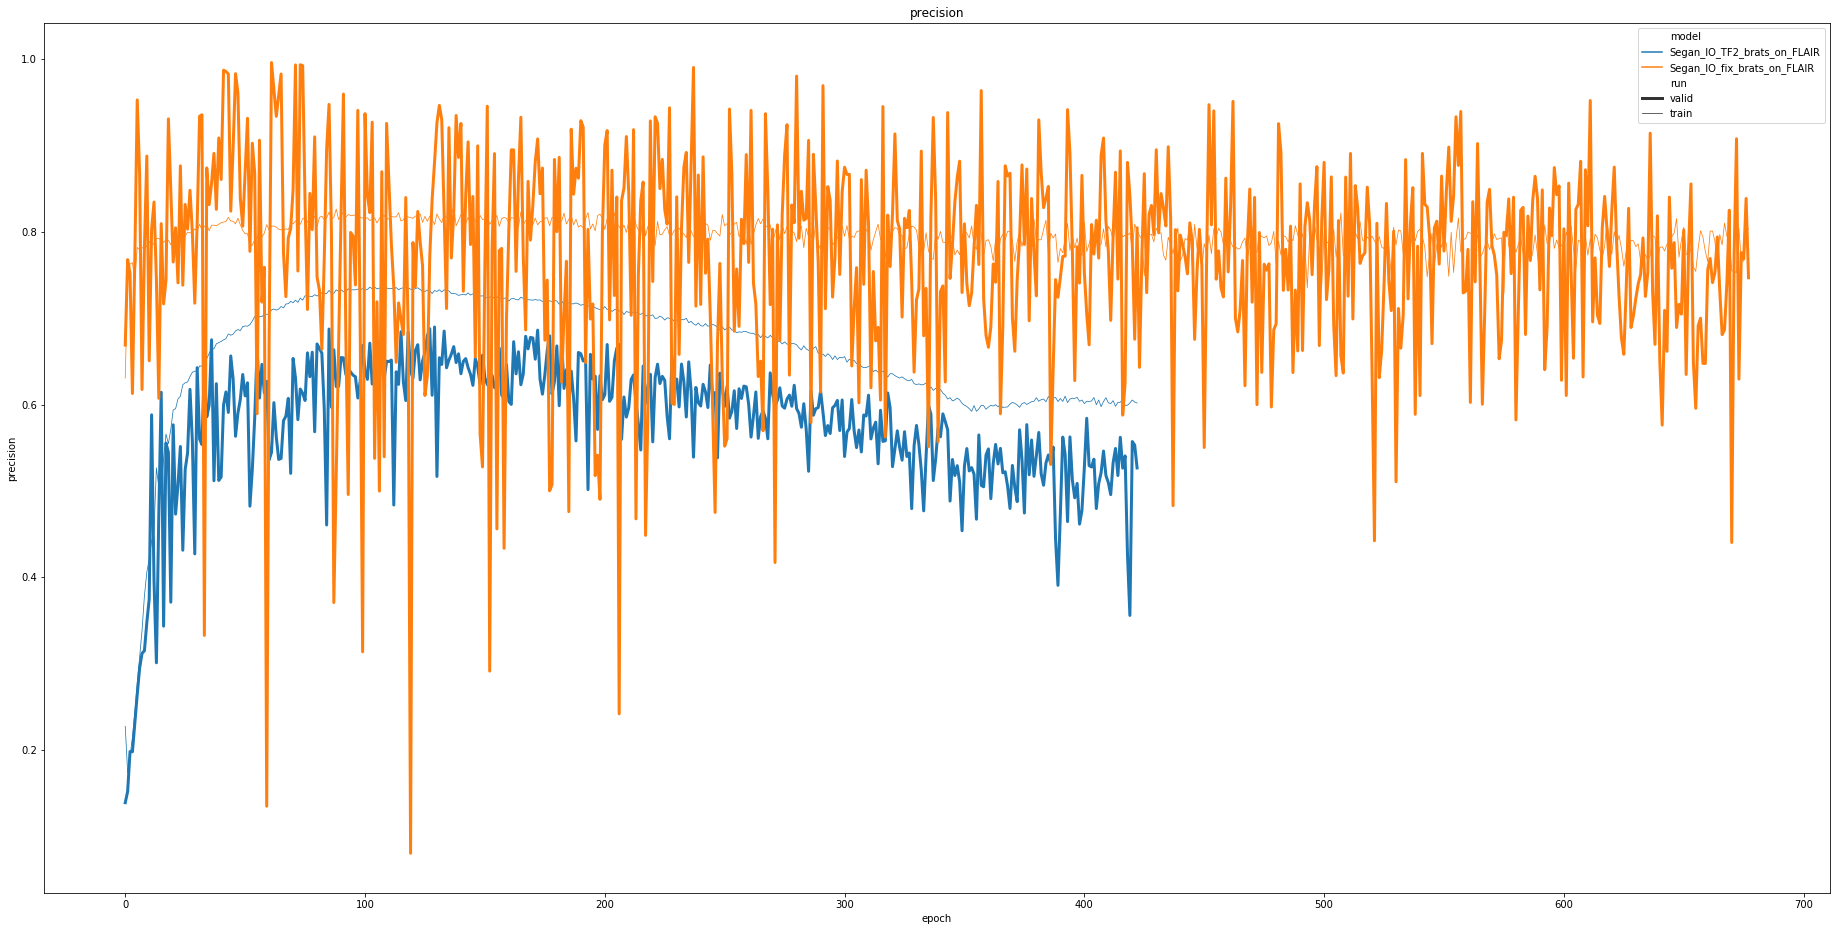

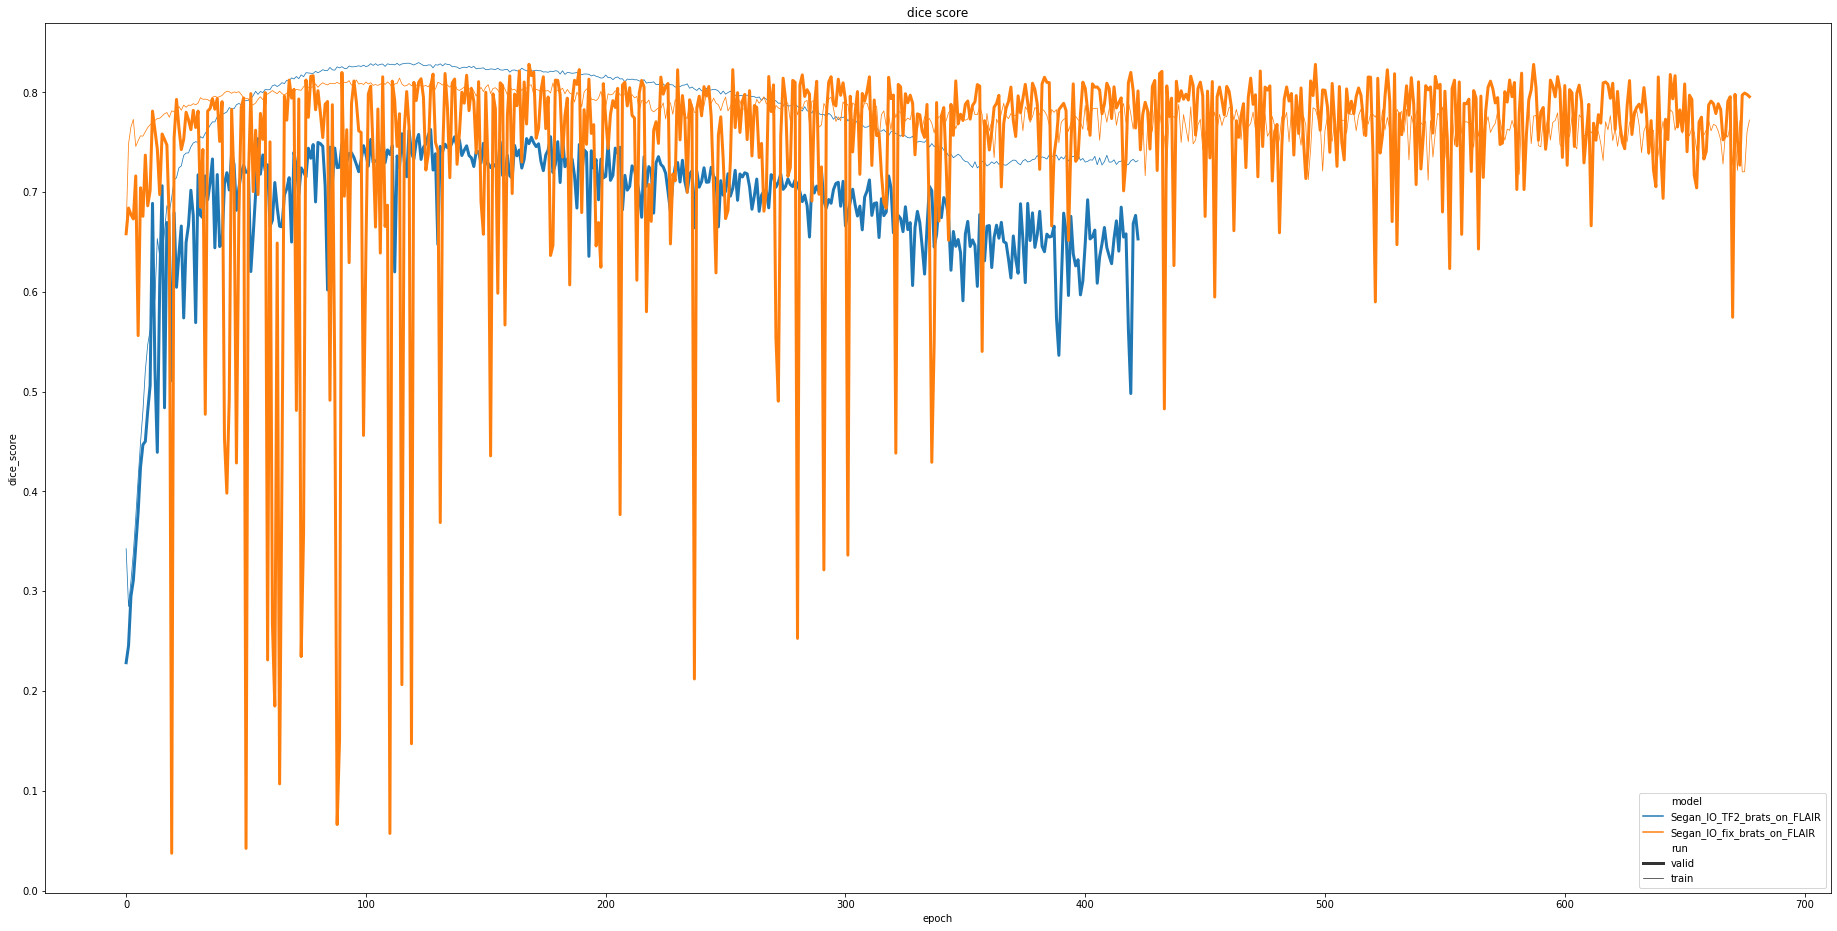

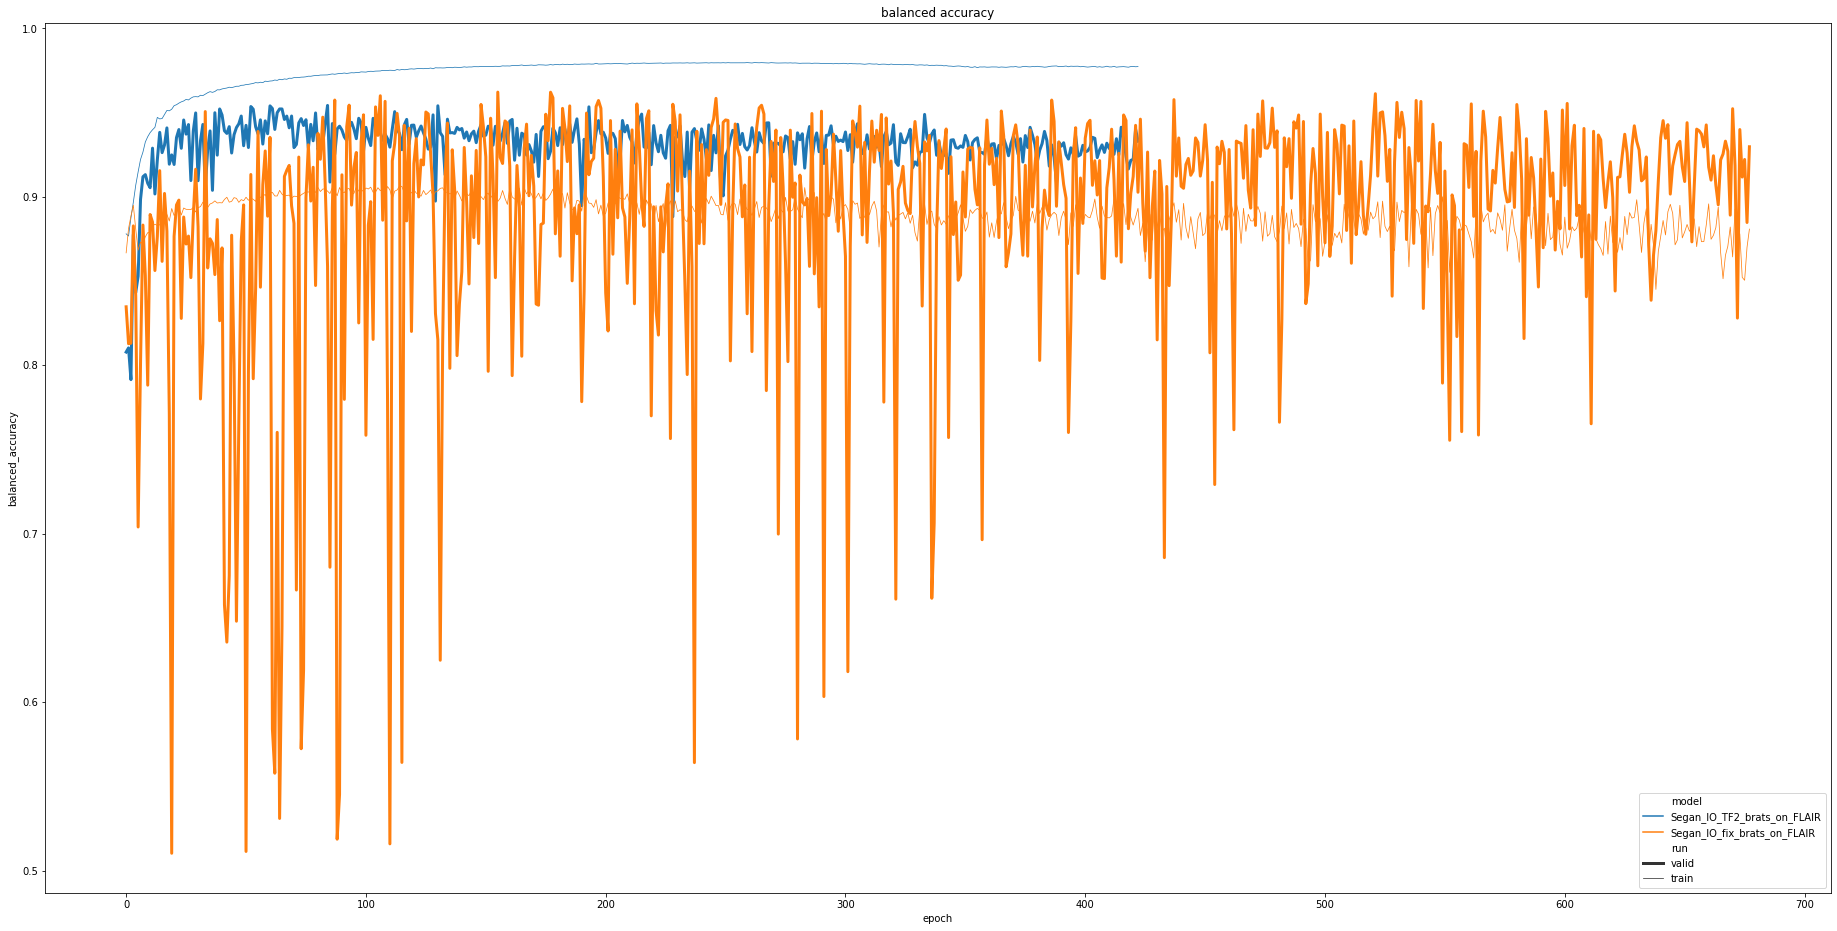

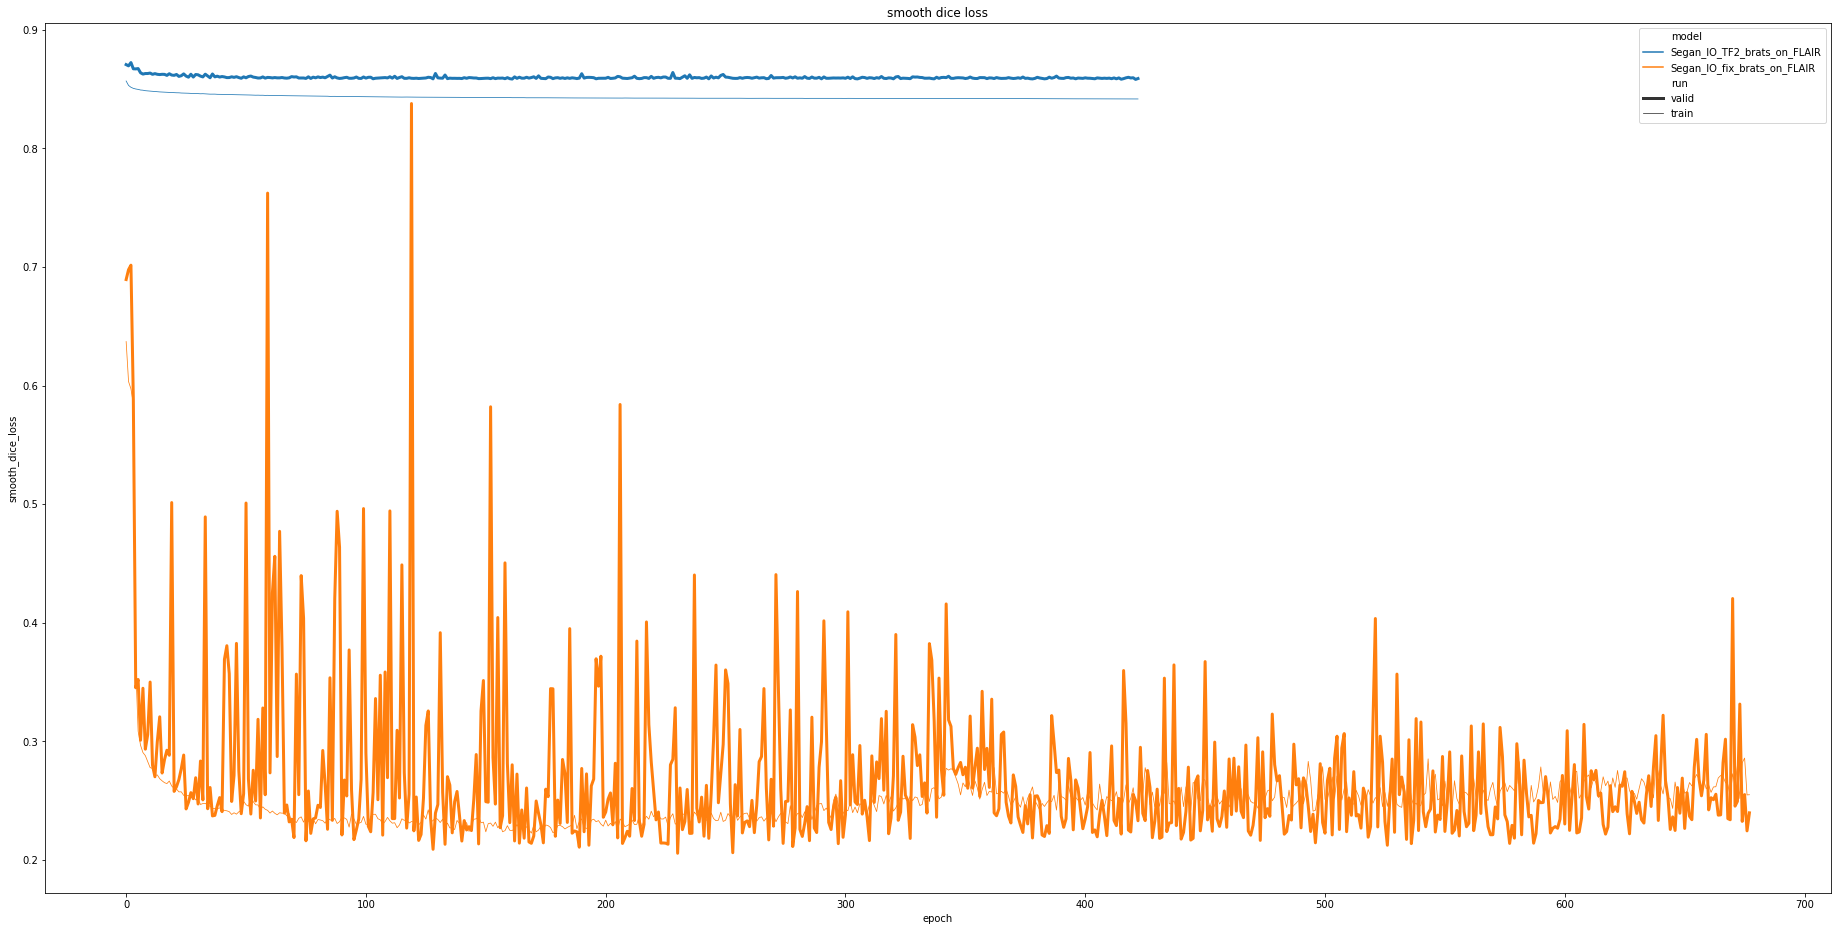

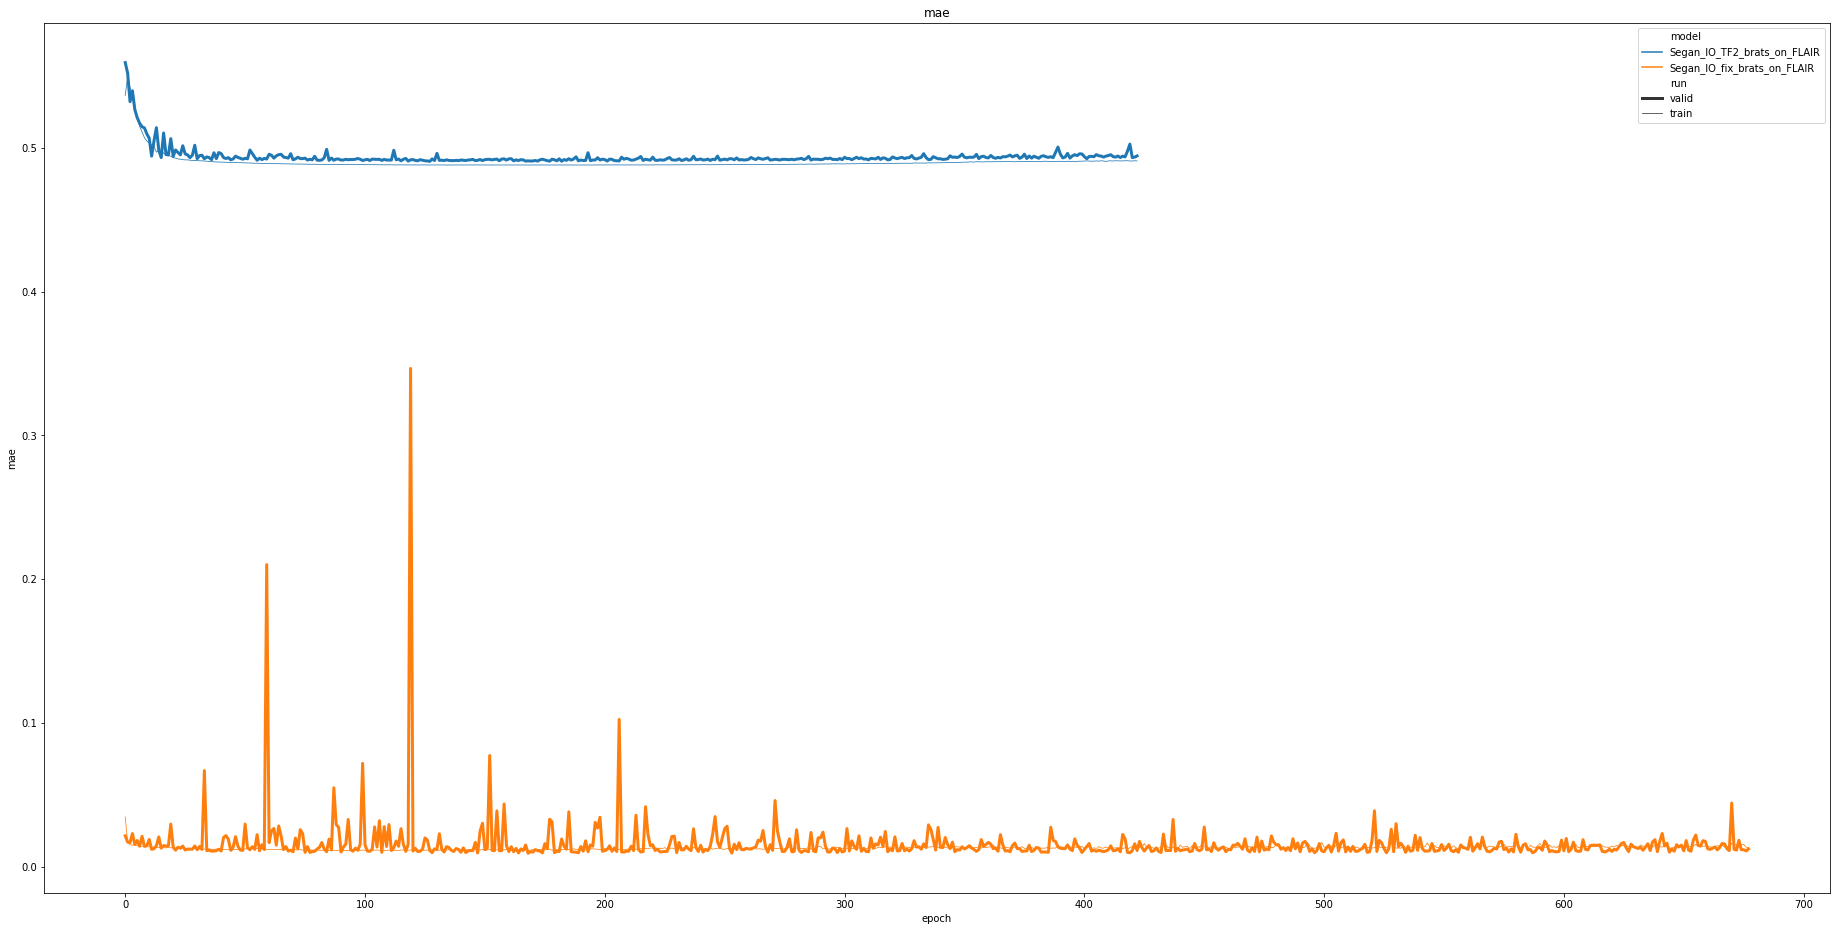

In [28]:
stats = [c for c in log.columns if c not in ['datetime', 'epoch', 'run', 'model']]
for s in stats:
    plot(s)